In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

# **Dataset Load**

In [ ]:
road=pd.read_csv("/content/RTA Dataset.csv")
road.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
road.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
road.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
road.shape

(12316, 32)

# **Data Visualization**

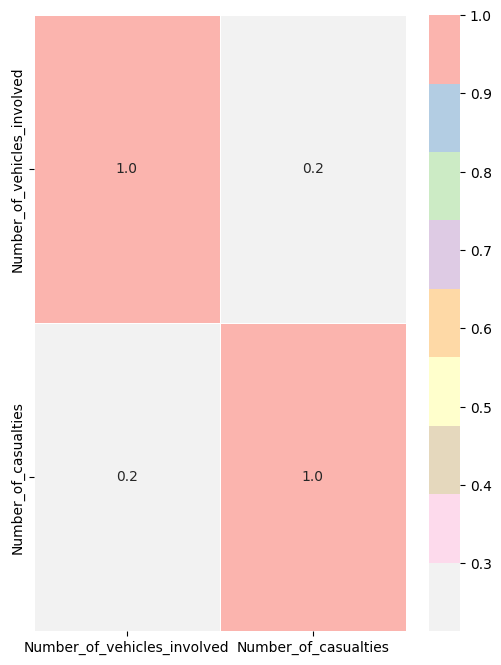

In [ ]:
# Correlation Heatmap
corr_matrix = road.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(6,8))
sns.heatmap(corr_matrix, cmap="Pastel1_r", annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

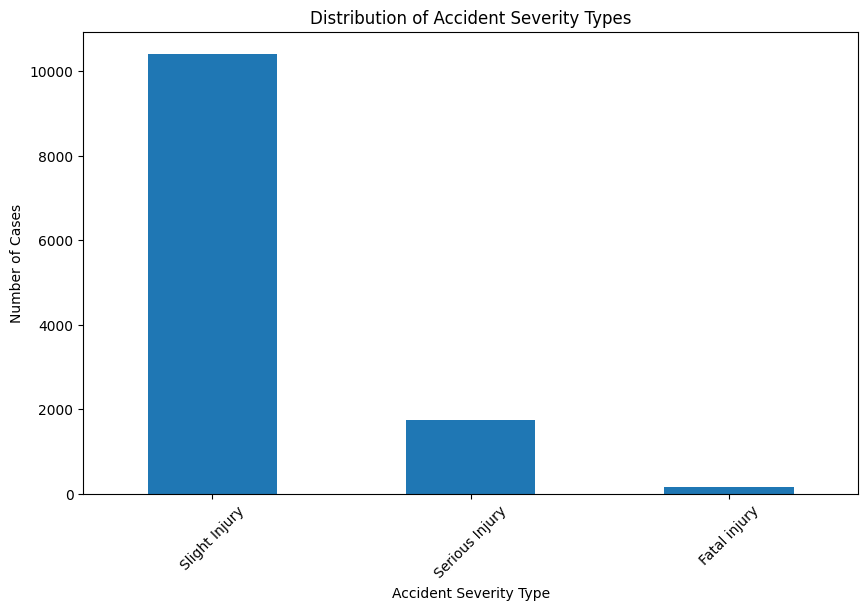

In [ ]:
class_counts = road['Accident_severity'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.xlabel('Accident Severity Type')
plt.ylabel('Number of Cases')
plt.title('Distribution of Accident Severity Types')
plt.xticks(rotation=45)
plt.show()

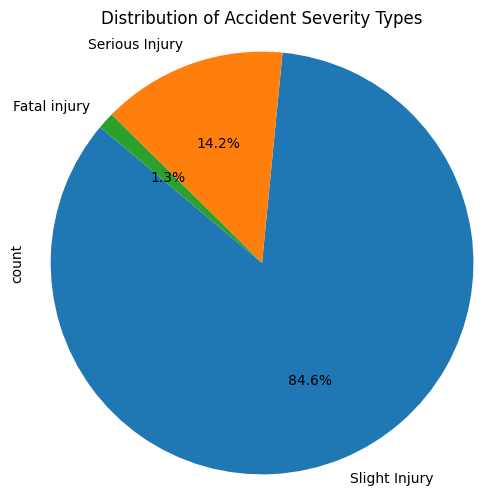

In [ ]:
class_counts = road['Accident_severity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accident Severity Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# **Data Preprocessing**

In [ ]:
road.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [ ]:
road2= road.copy(deep=True)
missing_values = {
    '': np.nan,
    'na': np.nan,
}
road2.replace(missing_values, inplace=True)
road2.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,NaN,NaN,NaN,NaN,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [ ]:
road2.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

**Dropping Null Value Columns**

In [ ]:
road2.drop(['Time','Sex_of_driver','Defect_of_vehicle',
           'Vehicle_driver_relation','Owner_of_vehicle',
           'Service_year_of_vehicle','Lanes_or_Medians','Road_allignment',
           'Types_of_Junction','Casualty_severity','Casualty_class',
           'Sex_of_casualty','Age_band_of_casualty','Work_of_casuality',
           'Fitness_of_casuality'],axis=1,inplace=True)

In [ ]:
road2.isnull().sum()

Day_of_week                      0
Age_band_of_driver               0
Educational_level              741
Driving_experience             829
Type_of_vehicle                950
Area_accident_occured          239
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

**Drop null vaue rows**

In [ ]:
road2 = road2.dropna(axis = 0, subset = ['Vehicle_movement','Type_of_collision','Type_of_vehicle'])
print("Shape after dropping:", road2.shape)

Shape after dropping: (10932, 17)


In [ ]:
road2.isnull().sum()

Day_of_week                      0
Age_band_of_driver               0
Educational_level              617
Driving_experience             691
Type_of_vehicle                  0
Area_accident_occured          199
Road_surface_type              147
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision                0
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement                 0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64

**Imputing values**

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Educational_level']])
road2[['Educational_level']] = imputer.transform(road2[['Educational_level']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Driving_experience']])
road2[['Driving_experience']] = imputer.transform(road2[['Driving_experience']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Area_accident_occured']])
road2[['Area_accident_occured']] = imputer.transform(road2[['Area_accident_occured']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Road_surface_type']])
road2[['Road_surface_type']] = imputer.transform(road2[['Road_surface_type']])

In [ ]:
road2.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Area_accident_occured          0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

 **Encoding**

In [ ]:
#Encoding features
from sklearn.preprocessing import LabelEncoder
# List of columns to label encode
columns_to_encode = ['Day_of_week',
 'Age_band_of_driver',
 'Educational_level',
 'Driving_experience',
 'Type_of_vehicle',
 'Area_accident_occured',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
     road2[column] = label_encoder.fit_transform(road2[column])


In [ ]:
road2.head()

,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,0,0,0,0,9,0,0,3,2,3,2,2,2,5,9,2
1,1,1,4,3,11,6,0,0,3,2,8,2,2,2,5,16,2
2,1,0,4,0,5,1,0,0,3,2,2,2,2,2,5,0,1
3,3,0,4,2,11,6,2,0,0,2,8,2,2,2,5,1,2
6,6,0,4,1,0,9,0,0,3,2,8,1,1,3,5,13,2


In [ ]:
#Correlation matrix
correl = road2.corr()
correl

,Day_of_week,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
Day_of_week,1.000000,0.017518,-0.003714,-0.015333,-0.002626,0.005428,0.014333,-0.005876,0.039052,-0.005991,0.004173,-0.005253,-0.046095,-0.028920,-0.005657,0.010156,-0.005871
Age_band_of_driver,0.017518,1.000000,0.014247,-0.012993,-0.001912,0.006819,0.000266,-0.035688,-0.005867,0.028002,0.002832,0.006767,-0.048107,-0.008034,-0.001060,-0.000552,0.015265
Educational_level,-0.003714,0.014247,1.000000,0.055602,0.008123,-0.005034,0.012978,0.007866,0.002045,0.001926,-0.003299,0.012884,0.005168,0.005848,0.001576,-0.001057,-0.001143
Driving_experience,-0.015333,-0.012993,0.055602,1.000000,0.012054,-0.002476,0.026931,-0.003123,-0.018122,0.003917,0.013138,-0.011733,-0.006477,0.006690,-0.015832,-0.004849,0.001979
Type_of_vehicle,-0.002626,-0.001912,0.008123,0.012054,1.000000,-0.008630,0.014596,0.012833,-0.000483,0.004578,0.026589,0.001022,0.006536,0.007339,0.009063,-0.005450,0.006132
Area_accident_occured,0.005428,0.006819,-0.005034,-0.002476,-0.008630,1.000000,-0.006134,-0.010163,-0.008520,0.003260,-0.006619,-0.018215,-0.009998,0.003534,0.001540,-0.010655,-0.017986
Road_surface_type,0.014333,0.000266,0.012978,0.026931,0.014596,-0.006134,1.000000,0.005902,-0.011468,0.006942,-0.027859,-0.002852,-0.002559,-0.004119,-0.007496,-0.020622,-0.002978
Road_surface_conditions,-0.005876,-0.035688,0.007866,-0.003123,0.012833,-0.010163,0.005902,1.000000,-0.199470,0.399077,0.003767,-0.024702,0.071286,-0.002018,0.002168,0.007623,0.007778
Light_conditions,0.039052,-0.005867,0.002045,-0.018122,-0.000483,-0.008520,-0.011468,-0.199470,1.000000,-0.069698,0.015533,0.029516,-0.052546,0.022829,0.015228,0.005053,0.026358
Weather_conditions,-0.005991,0.028002,0.001926,0.003917,0.004578,0.003260,0.006942,0.399077,-0.069698,1.000000,-0.007878,-0.041188,0.012055,0.012802,0.014254,0.001339,0.016741


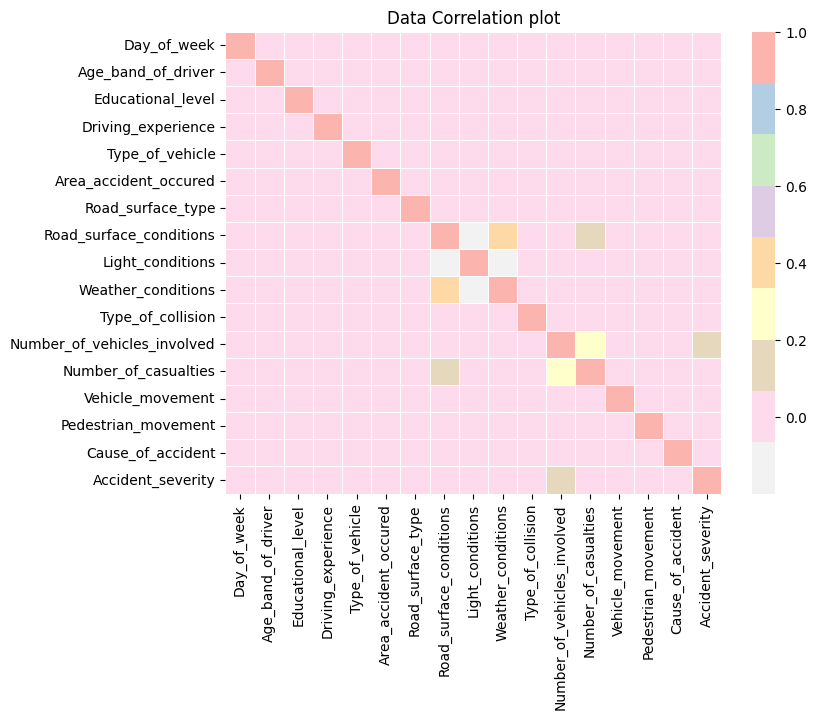

In [ ]:
#Correlation heatmap
correl = road2.corr()
correl

rcParams['figure.figsize'] = (8,6)
correl = road2.corr()
sns.heatmap(correl, cmap = 'Pastel1_r', linewidths=.5, fmt='.1f')
plt.title("Data Correlation plot")
plt.show()

In [ ]:
#Dividing into x and y
x = road2.drop(['Accident_severity'], axis = 1)
y = road2[['Accident_severity']]

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)

In [ ]:
#data splitting
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30)

# **Model Implementations**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

AccuracyKNN: 0.8042682926829269
Precision: 0.7490689262694151
Recall: 0.8042682926829269
F1 Score: 0.7712756681214098
classification report:               precision    recall  f1-score   support

           0       0.03      0.02      0.02        47
           1       0.21      0.09      0.13       462
           2       0.85      0.94      0.89      2771

    accuracy                           0.80      3280
   macro avg       0.36      0.35      0.35      3280
weighted avg       0.75      0.80      0.77      3280



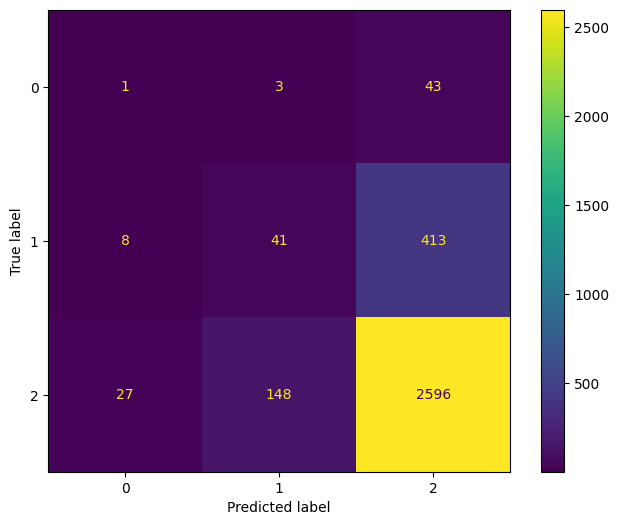

In [ ]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

y_pred_knn = knn.predict(xtest)

accuracyKNN = accuracy_score(ytest, y_pred_knn)
print("AccuracyKNN:", accuracyKNN)

precisionKNN = precision_score(ytest, y_pred_knn, average='weighted')
print('Precision:', precisionKNN)

recallKNN = recall_score(ytest, y_pred_knn, average='weighted')
print('Recall:', recallKNN)

f1KNN = f1_score(ytest, y_pred_knn, average='weighted')
print("F1 Score:", f1KNN)

cm = confusion_matrix(ytest, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
print('classification report:',classification_report(ytest,y_pred_knn))

disp.plot()
plt.show()

Accuracy: 0.7518292682926829
Precision: 0.761212731387734
Recall: 0.7518292682926829
F1 Score: 0.7564025604920297
classification report:               precision    recall  f1-score   support

           0       0.15      0.17      0.16        47
           1       0.21      0.23      0.22       462
           2       0.86      0.85      0.86      2771

    accuracy                           0.75      3280
   macro avg       0.41      0.42      0.41      3280
weighted avg       0.76      0.75      0.76      3280



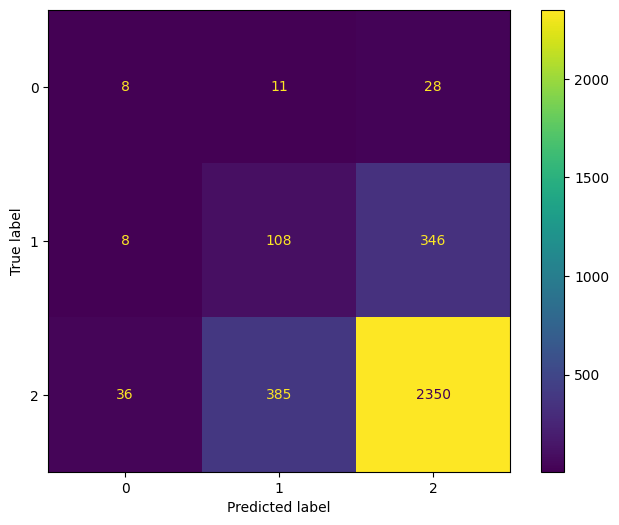

In [ ]:
# Applying Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier()

classifierDT.fit(xtrain, ytrain)

y_pred_DT = classifierDT.predict(xtest)

accuracyDT = accuracy_score(ytest, y_pred_DT)
print("Accuracy:", accuracyDT)

precisionDT = precision_score(ytest, y_pred_DT, average='weighted')
print('Precision:', precisionDT)

recallDT = recall_score(ytest, y_pred_DT, average='weighted')
print('Recall:', recallDT)

f1DT = f1_score(ytest, y_pred_DT, average='weighted')
print("F1 Score:", f1DT)

cm_DT = confusion_matrix(ytest, y_pred_DT)
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=classifierDT.classes_)
print('classification report:',classification_report(ytest,y_pred_DT))

disp_DT.plot()
plt.show()

Accuracy: 0.8332317073170732
Precision: 0.7544226172014691
Recall: 0.8332317073170732
F1 Score: 0.7788114738212291
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.27      0.05      0.08       462
           2       0.85      0.98      0.91      2771

    accuracy                           0.83      3280
   macro avg       0.37      0.34      0.33      3280
weighted avg       0.75      0.83      0.78      3280



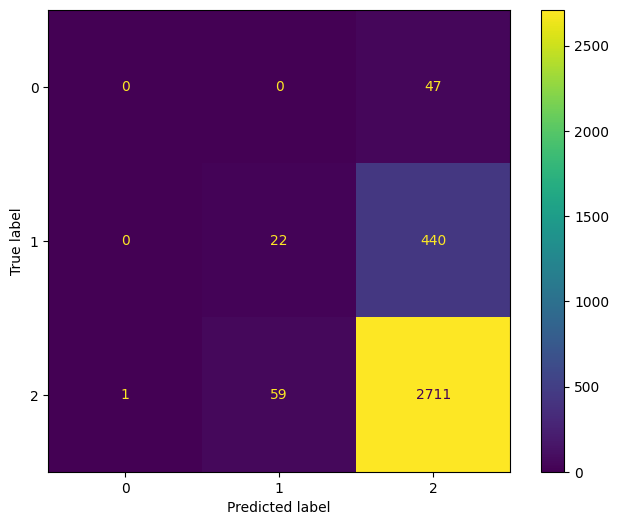

In [ ]:
#Applying an MLP classifier
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()


mlp_classifier.fit(xtrain, ytrain)


y_pred_mlp = mlp_classifier.predict(xtest)


accuracyMLP = accuracy_score(ytest, y_pred_mlp)
print("Accuracy:", accuracyMLP)


precisionMLP = precision_score(ytest, y_pred_mlp, average='weighted')
print('Precision:', precisionMLP)


recallMLP = recall_score(ytest, y_pred_mlp, average='weighted')
print('Recall:', recallMLP)


f1MLP = f1_score(ytest, y_pred_mlp, average='weighted')
print("F1 Score:", f1MLP)

cm_mlp = confusion_matrix(ytest, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)

print('Classification Report:')
print(classification_report(ytest, y_pred_mlp))


disp_mlp.plot()
plt.show()

Accuracy: 0.8185975609756098
Precision: 0.7445526845179916
Recall: 0.8185975609756098
F1 Score: 0.7703394709439706
classification report:               precision    recall  f1-score   support

           0       0.09      0.11      0.10        47
           1       0.19      0.03      0.06       462
           2       0.85      0.96      0.90      2771

    accuracy                           0.82      3280
   macro avg       0.38      0.37      0.35      3280
weighted avg       0.74      0.82      0.77      3280



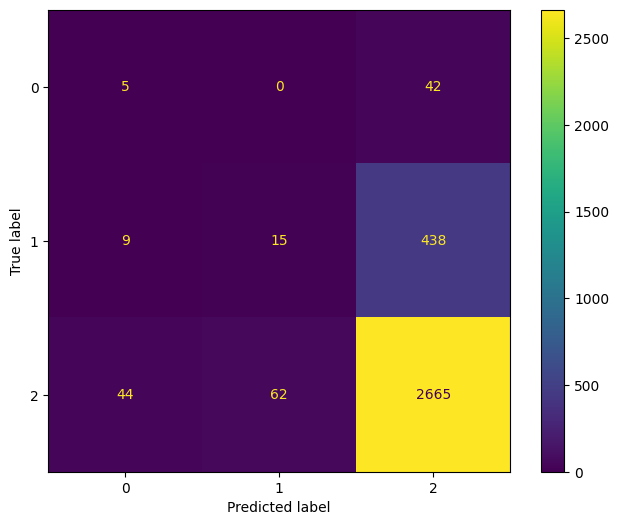

In [ ]:
# Applying  Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(xtrain, ytrain)

y_pred_nb = nb_classifier.predict(xtest)

accuracyNB = accuracy_score(ytest, y_pred_nb)
print("Accuracy:", accuracyNB)

precisionNB = precision_score(ytest, y_pred_nb, average='weighted')
print('Precision:', precisionNB)

recallNB = recall_score(ytest, y_pred_nb, average='weighted')
print('Recall:', recallNB)

f1NB = f1_score(ytest, y_pred_nb, average='weighted')
print("F1 Score:", f1NB)

cm_nb = confusion_matrix(ytest, y_pred_nb, labels=nb_classifier.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
print('classification report:',classification_report(ytest,y_pred_nb))

disp_nb.plot()
plt.show()


AccuracyRandomForest: 0.8478658536585366
PrecisionRandomForest: 0.809209088373639
RecallRandomForest: 0.8478658536585366
F1 Score: 0.7872500451775307
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.65      0.05      0.09       462
           2       0.85      1.00      0.92      2771

    accuracy                           0.85      3280
   macro avg       0.50      0.35      0.34      3280
weighted avg       0.81      0.85      0.79      3280



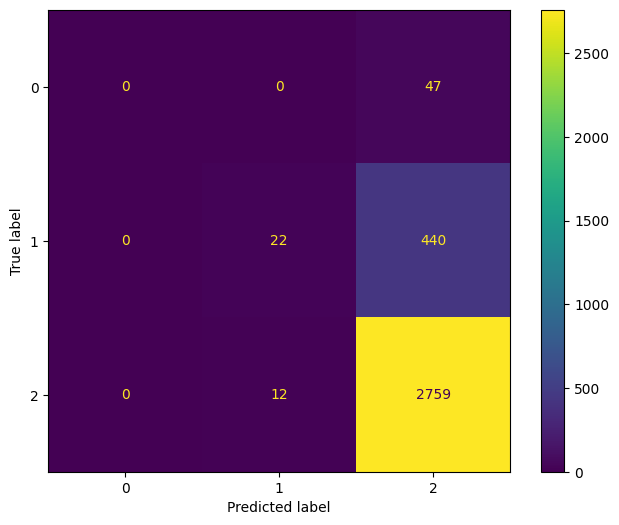

In [ ]:
#Applying Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(xtrain, ytrain)

y_pred_rf = random_forest.predict(xtest)

accuracyRF = accuracy_score(ytest, y_pred_rf)
print("AccuracyRandomForest:", accuracyRF)

precisionRF = precision_score(ytest, y_pred_rf, average='weighted')
print('PrecisionRandomForest:', precisionRF)

recallRF = recall_score(ytest, y_pred_rf, average='weighted')
print('RecallRandomForest:', recallRF)

f1KNN = f1_score(ytest, y_pred_rf, average='weighted')
print("F1 Score:", f1KNN)

cm_rf = confusion_matrix(ytest, y_pred_rf, labels=random_forest.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
print('classification report:',classification_report(ytest,y_pred_rf))

disp_rf.plot()
plt.show()

Accuracy: 0.8448170731707317
Precision: 0.7137158871207615
Recall: 0.8448170731707317
F1 Score: 0.773752473890629
classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00       462
           2       0.84      1.00      0.92      2771

    accuracy                           0.84      3280
   macro avg       0.28      0.33      0.31      3280
weighted avg       0.71      0.84      0.77      3280



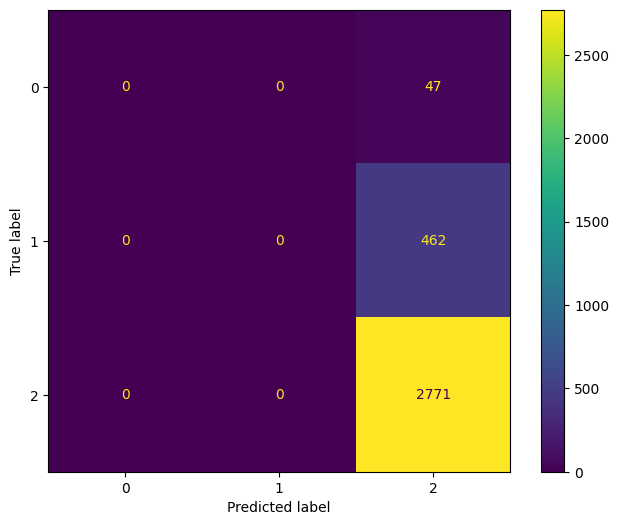

In [ ]:
#Applying an SVM classifier

from sklearn import svm

svm_classifier = svm.SVC()

svm_classifier.fit(xtrain, ytrain)

y_pred_svm = svm_classifier.predict(xtest)

accuracySVM = accuracy_score(ytest, y_pred_svm)
print("Accuracy:", accuracySVM)

precisionSVM = precision_score(ytest, y_pred_svm, average='weighted')
print('Precision:', precisionSVM)

recallSVM = recall_score(ytest, y_pred_svm, average='weighted')
print('Recall:', recallSVM)

f1SVM = f1_score(ytest, y_pred_svm, average='weighted')
print("F1 Score:", f1SVM)

cm_svm = confusion_matrix(ytest, y_pred_svm, labels=svm_classifier.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
print('classification report:',classification_report(ytest,y_pred_svm))

disp_svm.plot()
plt.show()

**Final bar chart for Accuracies**

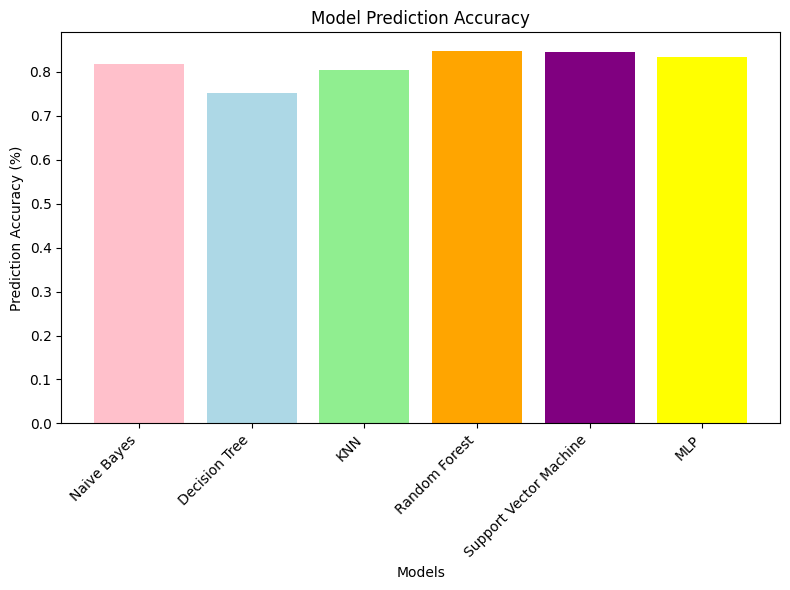

In [ ]:
models = ['Naive Bayes','Decision Tree', 'KNN', 'Random Forest','Support Vector Machine','MLP']
accuracies = [accuracyNB, accuracyDT, accuracyKNN, accuracyRF, accuracySVM, accuracyMLP]
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'purple','yellow']

# Create a bar chart
plt.bar(models, accuracies, color=colors)
plt.xticks(rotation=45, ha='right')
# Add labels
plt.xlabel('Models')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Model Prediction Accuracy')
plt.tight_layout()

plt.show()

**Final bar chart for Precision**

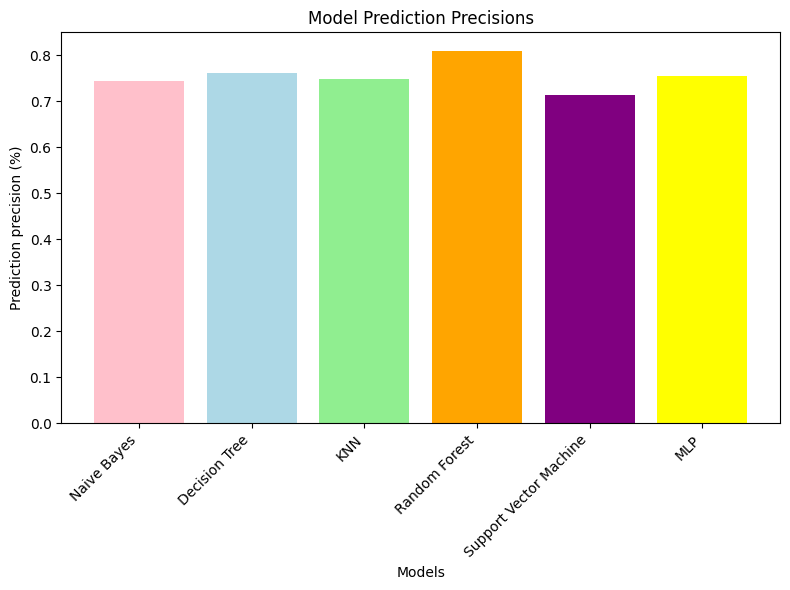

In [ ]:
models = ['Naive Bayes','Decision Tree', 'KNN', 'Random Forest','Support Vector Machine','MLP']
precisions = [precisionNB,precisionDT, precisionKNN, precisionRF, precisionSVM, precisionMLP]
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'purple','yellow']

# Create a bar chart
plt.bar(models, precisions, color=colors)
plt.xticks(rotation=45, ha='right')
# Add labels
plt.xlabel('Models')
plt.ylabel('Prediction precision (%)')
plt.title('Model Prediction Precisions')
plt.tight_layout()

plt.show()

**Final bar chart for Recall**

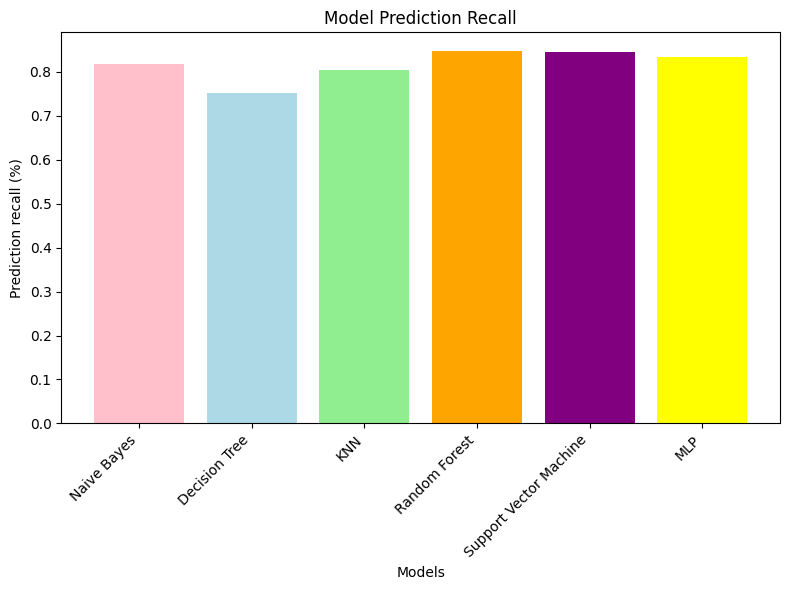

In [ ]:
models = ['Naive Bayes','Decision Tree', 'KNN', 'Random Forest','Support Vector Machine','MLP']
recalls = [recallNB, recallDT, recallKNN, recallRF, recallSVM, recallMLP]
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'purple','yellow']

# Create a bar chart
plt.bar(models, recalls, color=colors)
plt.xticks(rotation=45, ha='right')
# Add labels
plt.xlabel('Models')
plt.ylabel('Prediction recall (%)')
plt.title('Model Prediction Recall')
plt.tight_layout()

plt.show()

# **Running the models after oversampling**

Accident_severity
Serious Injury    10415
Slight Injury     10415
Fatal injury      10415
Name: count, dtype: int64


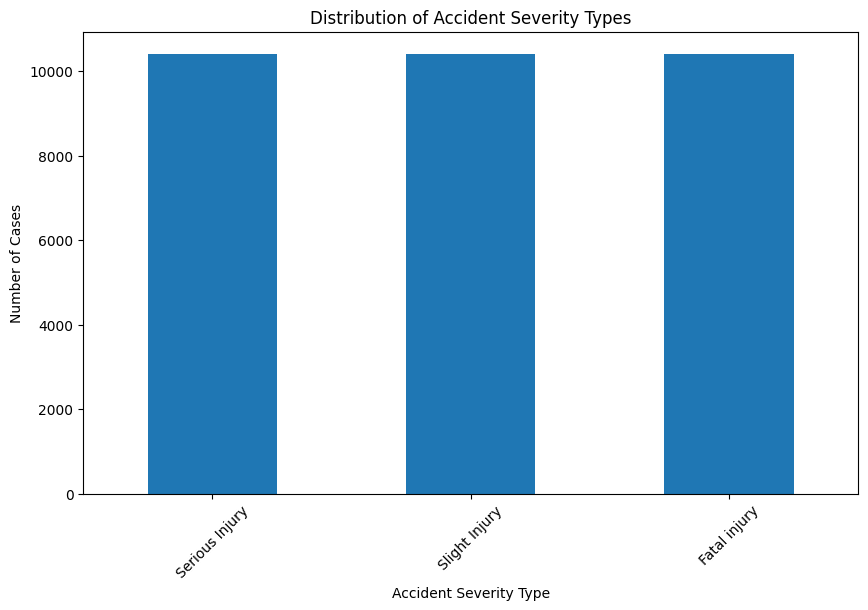

In [ ]:
# Upsampling the minority classes
slight = road[road['Accident_severity'] == 'Slight Injury']
serious = road[road['Accident_severity'] == 'Serious Injury']
fatal = road[road['Accident_severity'] == 'Fatal injury']

from sklearn.utils import resample
serious_upsampled = resample(serious, replace=True, n_samples=len(slight))
fatal_upsampled = resample(fatal, replace=True, n_samples=len(slight))

# Concatenating the upsampled data
road = pd.concat([slight, serious_upsampled, fatal_upsampled])

# Shuffle the DataFrame
road = road.sample(frac=1).reset_index(drop=True)

# Checking the class distribution
upsamp= road['Accident_severity'].value_counts()
print(upsamp)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
upsamp.plot(kind='bar')
plt.xlabel('Accident Severity Type')
plt.ylabel('Number of Cases')
plt.title('Distribution of Accident Severity Types')
plt.xticks(rotation=45)
plt.show()

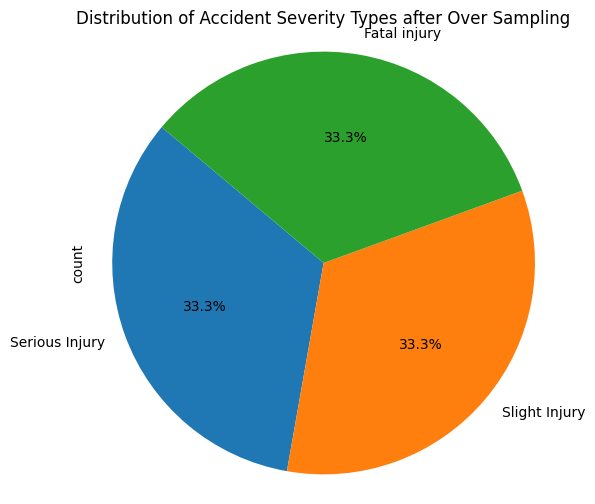

In [ ]:
class_counts = road['Accident_severity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accident Severity Types after Over Sampling')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
road2= road.copy(deep=True)
missing_values = {
    '': np.nan,
    'na': np.nan,
}
road2.replace(missing_values, inplace=True)

road2.drop(['Time','Sex_of_driver','Defect_of_vehicle','Vehicle_driver_relation','Owner_of_vehicle','Service_year_of_vehicle','Lanes_or_Medians','Road_allignment','Types_of_Junction','Casualty_severity','Casualty_class','Sex_of_casualty','Age_band_of_casualty','Work_of_casuality','Fitness_of_casuality'],axis=1,inplace=True)

road2 = road2.dropna(axis = 0, subset = ['Vehicle_movement','Type_of_collision','Type_of_vehicle'])
print("Shape after dropping:", road2.shape)

#Imputing values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Educational_level']])
road2[['Educational_level']] = imputer.transform(road2[['Educational_level']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Driving_experience']])
road2[['Driving_experience']] = imputer.transform(road2[['Driving_experience']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Area_accident_occured']])
road2[['Area_accident_occured']] = imputer.transform(road2[['Area_accident_occured']])

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(road2[['Road_surface_type']])
road2[['Road_surface_type']] = imputer.transform(road2[['Road_surface_type']])


#Encoding features

from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
columns_to_encode = ['Day_of_week',
'Age_band_of_driver',
'Educational_level',
'Driving_experience',
'Type_of_vehicle',
'Area_accident_occured',
'Road_surface_type',
'Road_surface_conditions',
'Light_conditions',
'Weather_conditions',
'Type_of_collision',
'Vehicle_movement',
'Pedestrian_movement',
'Cause_of_accident',
'Accident_severity']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    road2[column] = label_encoder.fit_transform(road2[column])

Shape after dropping: (27735, 17)


In [ ]:
x = road2.drop(['Accident_severity'], axis = 1)
y = road2[['Accident_severity']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report

Accuracy: 0.4313183511597164
Precision: 0.42563444253068317
Recall: 0.4313183511597164
F1 Score: 0.4125992160954003
classification report:               precision    recall  f1-score   support

           0       0.43      0.66      0.52      2784
           1       0.39      0.22      0.28      2775
           2       0.46      0.41      0.43      2762

    accuracy                           0.43      8321
   macro avg       0.43      0.43      0.41      8321
weighted avg       0.43      0.43      0.41      8321



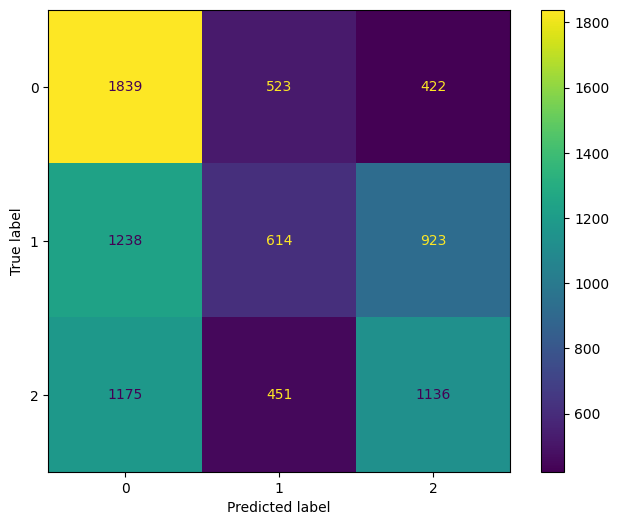

In [ ]:
# Applying  Gaussian Naive Bayes classifier

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(xtrain, ytrain)

y_pred_nb = nb_classifier.predict(xtest)

accuracyNB = accuracy_score(ytest, y_pred_nb)
print("Accuracy:", accuracyNB)

precisionNB = precision_score(ytest, y_pred_nb, average='weighted')
print('Precision:', precisionNB)

recallNB = recall_score(ytest, y_pred_nb, average='weighted')
print('Recall:', recallNB)

f1NB = f1_score(ytest, y_pred_nb, average='weighted')
print("F1 Score:", f1NB)

cm_nb = confusion_matrix(ytest, y_pred_nb, labels=nb_classifier.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
print('classification report:',classification_report(ytest,y_pred_nb))

disp_nb.plot()
plt.show()


Accuracy: 0.9313784400913352
Precision: 0.939187485075886
Recall: 0.9313784400913352
F1 Score: 0.930342391685106
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2784
           1       0.85      0.99      0.91      2775
           2       0.99      0.80      0.89      2762

    accuracy                           0.93      8321
   macro avg       0.94      0.93      0.93      8321
weighted avg       0.94      0.93      0.93      8321



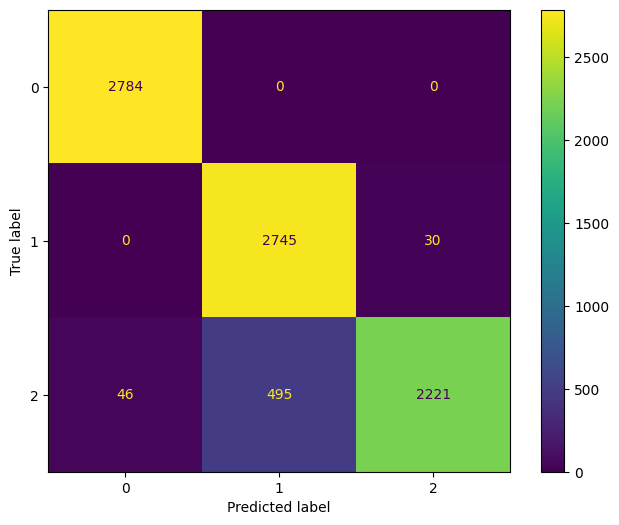

In [ ]:
# Applying Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier()

classifierDT.fit(xtrain, ytrain)

y_pred_DT = classifierDT.predict(xtest)

accuracyDT = accuracy_score(ytest, y_pred_DT)
print("Accuracy:", accuracyDT)

precisionDT = precision_score(ytest, y_pred_DT, average='weighted')
print('Precision:', precisionDT)

recallDT = recall_score(ytest, y_pred_DT, average='weighted')
print('Recall:', recallDT)

f1DT = f1_score(ytest, y_pred_DT, average='weighted')
print("F1 Score:", f1DT)

cm_DT = confusion_matrix(ytest, y_pred_DT)
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=classifierDT.classes_)
print('classification report:',classification_report(ytest,y_pred_DT))

disp_DT.plot()
plt.show()

AccuracyKNN: 0.8780194688138445
Precision: 0.8928471909377249
Recall: 0.8780194688138445
F1 Score: 0.8747493052411968
classification report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2784
           1       0.76      0.96      0.85      2775
           2       0.94      0.68      0.79      2762

    accuracy                           0.88      8321
   macro avg       0.89      0.88      0.87      8321
weighted avg       0.89      0.88      0.87      8321



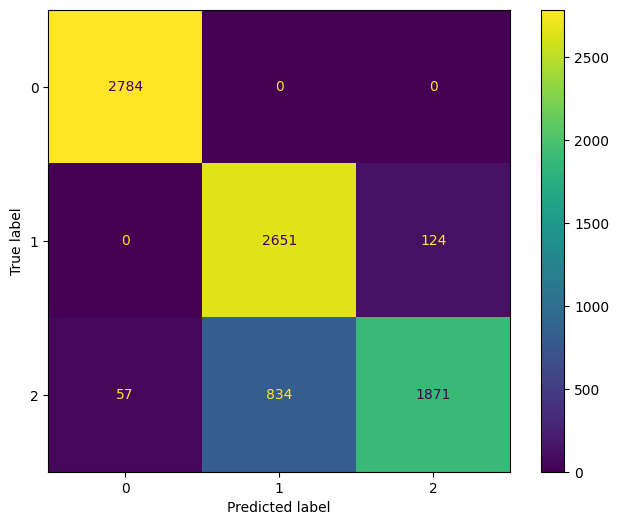

In [ ]:
# Applying KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

y_pred_knn = knn.predict(xtest)

accuracyKNN = accuracy_score(ytest, y_pred_knn)
print("AccuracyKNN:", accuracyKNN)

precisionKNN = precision_score(ytest, y_pred_knn, average='weighted')
print('Precision:', precisionKNN)

recallKNN = recall_score(ytest, y_pred_knn, average='weighted')
print('Recall:', recallKNN)

f1KNN = f1_score(ytest, y_pred_knn, average='weighted')
print("F1 Score:", f1KNN)

cm = confusion_matrix(ytest, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
print('classification report:',classification_report(ytest,y_pred_knn))

disp.plot()
plt.show()

AccuracyRandomForest: 0.9789688739334215
PrecisionRandomForest: 0.9793499746124633
RecallRandomForest: 0.9789688739334215
F1 Score: 0.9789408097814101
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2784
           1       0.95      0.99      0.97      2775
           2       0.99      0.95      0.97      2762

    accuracy                           0.98      8321
   macro avg       0.98      0.98      0.98      8321
weighted avg       0.98      0.98      0.98      8321



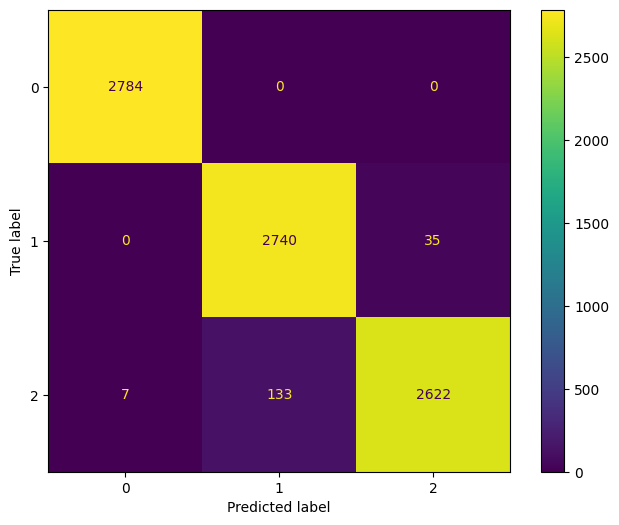

In [ ]:
#Applying Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(xtrain, ytrain)

y_pred_rf = random_forest.predict(xtest)

accuracyRF = accuracy_score(ytest, y_pred_rf)
print("AccuracyRandomForest:", accuracyRF)

precisionRF = precision_score(ytest, y_pred_rf, average='weighted')
print('PrecisionRandomForest:', precisionRF)

recallRF = recall_score(ytest, y_pred_rf, average='weighted')
print('RecallRandomForest:', recallRF)

f1KNN = f1_score(ytest, y_pred_rf, average='weighted')
print("F1 Score:", f1KNN)

cm_rf = confusion_matrix(ytest, y_pred_rf, labels=random_forest.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
print('classification report:',classification_report(ytest,y_pred_rf))

disp_rf.plot()
plt.show()

Accuracy: 0.7700997476264873
Precision: 0.7672977882784188
Recall: 0.7700997476264873
F1 Score: 0.766754679194052
classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95      2784
           1       0.72      0.62      0.67      2775
           2       0.66      0.71      0.68      2762

    accuracy                           0.77      8321
   macro avg       0.77      0.77      0.77      8321
weighted avg       0.77      0.77      0.77      8321



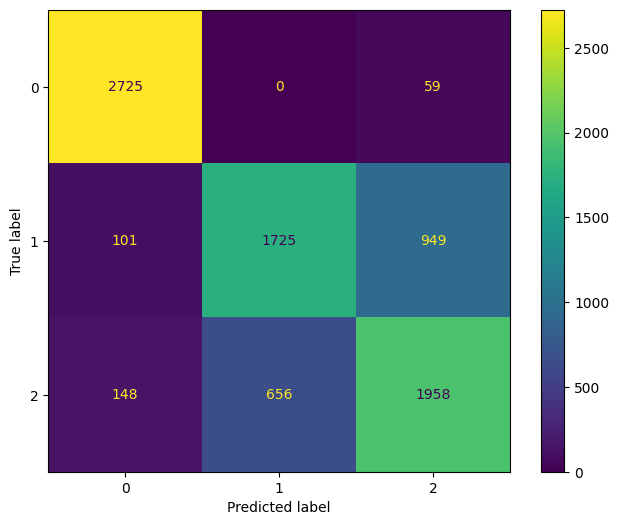

In [ ]:
#Applying an SVM classifier

from sklearn import svm

svm_classifier = svm.SVC()

svm_classifier.fit(xtrain, ytrain)

y_pred_svm = svm_classifier.predict(xtest)

accuracySVM = accuracy_score(ytest, y_pred_svm)
print("Accuracy:", accuracySVM)

precisionSVM = precision_score(ytest, y_pred_svm, average='weighted')
print('Precision:', precisionSVM)

recallSVM = recall_score(ytest, y_pred_svm, average='weighted')
print('Recall:', recallSVM)

f1SVM = f1_score(ytest, y_pred_svm, average='weighted')
print("F1 Score:", f1SVM)

cm_svm = confusion_matrix(ytest, y_pred_svm, labels=svm_classifier.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
print('classification report:',classification_report(ytest,y_pred_svm))

disp_svm.plot()
plt.show()

Accuracy: 0.7896887393342147
Precision: 0.789424106632646
Recall: 0.7896887393342147
F1 Score: 0.7876270064655071
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2784
           1       0.67      0.75      0.71      2775
           2       0.71      0.62      0.66      2762

    accuracy                           0.79      8321
   macro avg       0.79      0.79      0.79      8321
weighted avg       0.79      0.79      0.79      8321



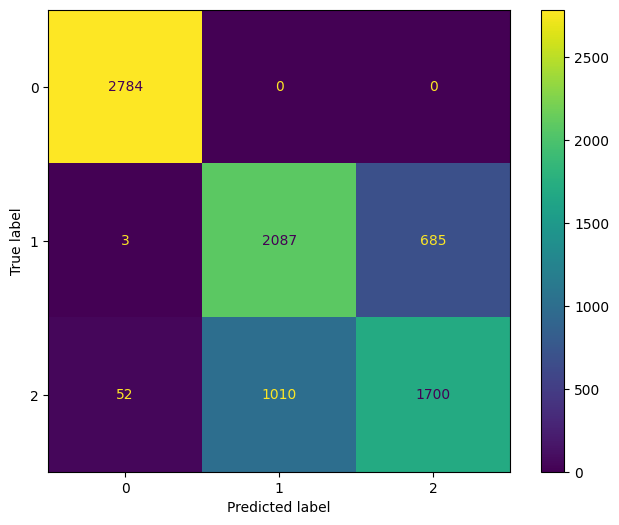

In [ ]:
#Applying an MLP classifier
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier()


mlp_classifier.fit(xtrain, ytrain)


y_pred_mlp = mlp_classifier.predict(xtest)


accuracyMLP = accuracy_score(ytest, y_pred_mlp)
print("Accuracy:", accuracyMLP)


precisionMLP = precision_score(ytest, y_pred_mlp, average='weighted')
print('Precision:', precisionMLP)


recallMLP = recall_score(ytest, y_pred_mlp, average='weighted')
print('Recall:', recallMLP)


f1MLP = f1_score(ytest, y_pred_mlp, average='weighted')
print("F1 Score:", f1MLP)

cm_mlp = confusion_matrix(ytest, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)

print('Classification Report:')
print(classification_report(ytest, y_pred_mlp))


disp_mlp.plot()
plt.show()

**Final bar chart for Accuracies**

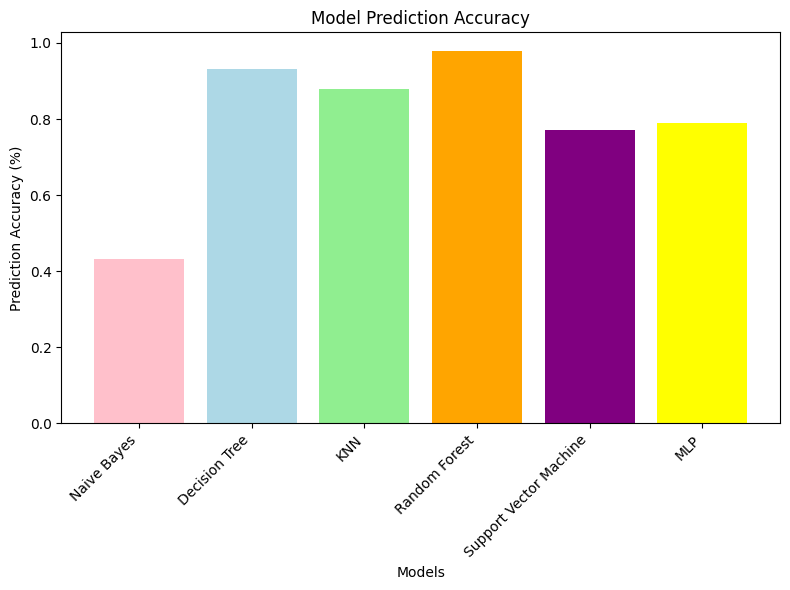

In [ ]:
models = ['Naive Bayes','Decision Tree', 'KNN', 'Random Forest','Support Vector Machine','MLP']
accuracies = [accuracyNB, accuracyDT, accuracyKNN, accuracyRF, accuracySVM, accuracyMLP]
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'purple','yellow']

# Create a bar chart
plt.bar(models, accuracies, color=colors)
plt.xticks(rotation=45, ha='right')
# Add labels
plt.xlabel('Models')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Model Prediction Accuracy')
plt.tight_layout()

plt.show()

**Final bar chart for Precision**

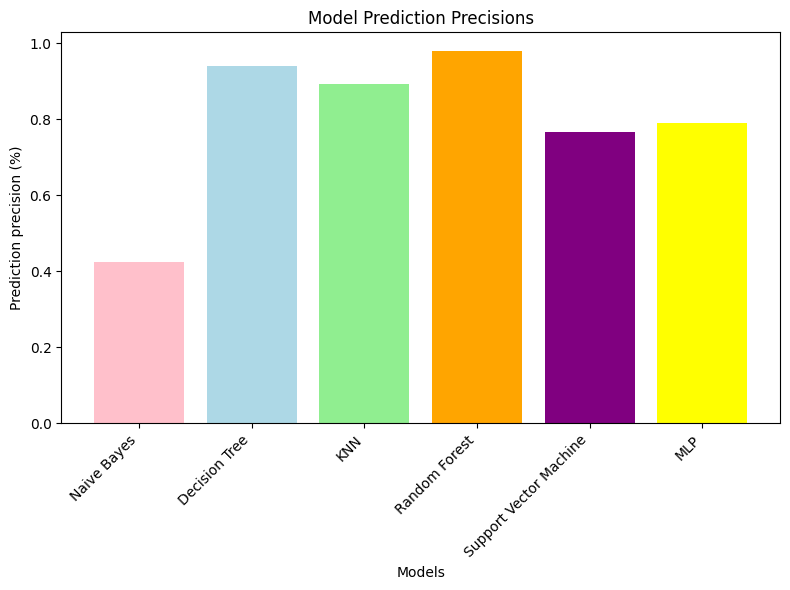

In [ ]:
models = ['Naive Bayes','Decision Tree', 'KNN', 'Random Forest','Support Vector Machine','MLP']
precisions = [precisionNB,precisionDT, precisionKNN, precisionRF, precisionSVM, precisionMLP]
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'purple','yellow']

# Create a bar chart
plt.bar(models, precisions, color=colors)
plt.xticks(rotation=45, ha='right')
# Add labels
plt.xlabel('Models')
plt.ylabel('Prediction precision (%)')
plt.title('Model Prediction Precisions')
plt.tight_layout()

plt.show()

**Final bar chart for Recall**

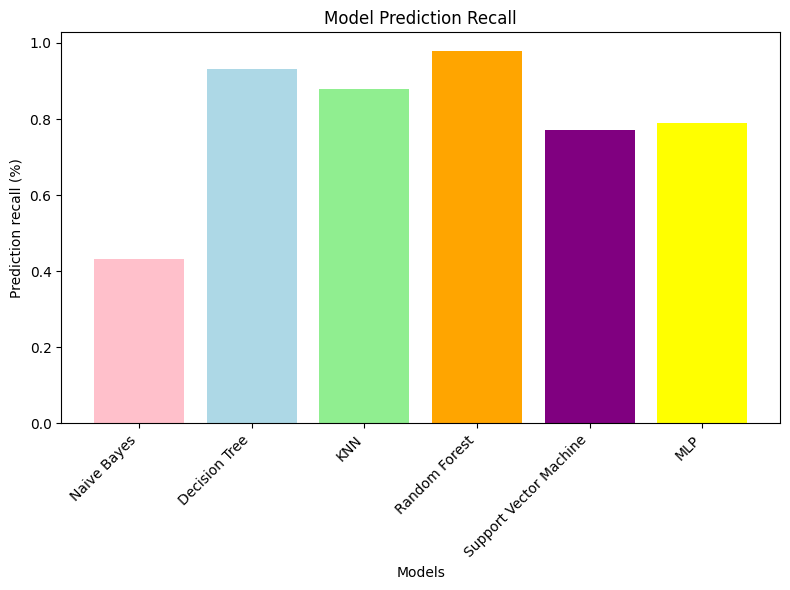

In [ ]:
models = ['Naive Bayes','Decision Tree', 'KNN', 'Random Forest','Support Vector Machine', 'MLP']
recalls = [recallNB, recallDT, recallKNN, recallRF, recallSVM, recallMLP]
colors = ['pink', 'lightblue', 'lightgreen', 'orange', 'purple','yellow']

# Create a bar chart
plt.bar(models, recalls, color=colors)
plt.xticks(rotation=45, ha='right')
# Add labels
plt.xlabel('Models')
plt.ylabel('Prediction recall (%)')
plt.title('Model Prediction Recall')
plt.tight_layout()

plt.show()